# **Holiday Package Prediction**
 ## Stages of ML
 - Grasping The Problem
 - Gathering Data
 - Refining Dataset
 - EDA
 - Preparing Data for processing
 - Model Training
 - Choose Best Model
 


# **Problem Statement**
Trips and travel.com seeks to expand its customer base by introducing a new Wellness Tourism Package while reducing high market costs. The company aims to leverage customer data for targeted outreach to improve sales efficiency and optimize marketing expenditure.

# **Data Collection**

The Dataset is collected from [Holiday Package Prediction](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction)
- Consists of 20 column and 4888 rows.
- This analysis purpose to evaluate various machine learning models and identify the best one for anticipating client package purchases. The Process involves a detailed EDA to uncover significant patterns and factors, followed by model performance evaluation to draw meaningful conclusions.

## **Pre Data Exploration**

- The very initial thing in the Data exploration involves integrating libraries to read the Data.
- The next phase involves examining the Data using the df.head() which allows to view first 5 results from top and df.tail() shows last 5 results. However you can put any number in parenthesis to view as per your choice
- Lately in the next step we can view summary statistics of the dataset numeric values including count, mean, std deviation, minimum, percentile, & maximum with df.describe().
- And lastly for overall structure, datatypes and missing values we can see with df.info().

**Importing Libraries and loading dataset**

In [7]:
#Importing essential libraries for data manipulation, visulaization and pandas Modelling

#Libraries for data handling and numerical computation
#importing Pandas for manipulating data 
import pandas as pd #for handling Dataframe
#numpy for handling arrays 
import numpy as np #for Numerical operation

#Visualization Libraries
#Matplotlib is called for Plots and Visualization
import matplotlib.pyplot as plt

# for enhanced Stats Visualization
import seaborn as sns 
import plotly.express as px #for Interative Visualization

#Suppressing Warning for a cleaner output
import warnings #for warnings
warnings.filterwarnings("ignore")

#Sklearn Module for Machine Learning and Preprocessing
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Sampling techniques for handling imbalance Data
from imblearn.over_sampling import SMOTE #handling imbalancedaata
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTETomek, SMOTEENN

# Machine Learnign Libraries
#importing regression from sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier ## isSupervised learning Algorith
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier #this is ensemble learning Method for accuracy
from sklearn.tree  import DecisionTreeClassifier #implement decision free for Classification 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression #is a Classification algorith

# Evaluation Matrices
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler #for standardizingfeature
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Additional module for general metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

## **Exploring Data and Doing Analysis**
- Initial phase in exploring Data involves setting a pipeline where we explore the data aiming to understand composition and structure of Data.
- To explore the Data and understand its structure, distribution and quality, Follow these steps for Categorical Features,numerical features, and the target variable(ProdTaken)

In [9]:
# Reading CSV
Travel_data = pd.read_csv("D:\\Travel.csv")

In [10]:
#Show top 10 Records
Travel_data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [11]:
# Understanding the structure of data we are using df.Shape function or print(Travel_df.shape)
#we can use len(df.columns) for columns, Here we have 4888 rows and 20 columns
Travel_data.shape

(4888, 20)

In [12]:
#storing Column name in a Variable
Column_Travel=Travel_data.columns
#display
print(Column_Travel)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


In [13]:
#Check Datatype of features in dataset
Travel_data.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [14]:
features_with_na = Travel_data.columns[Travel_data.isnull().any()].tolist()
numerical_na_cols = Travel_data[features_with_na].select_dtypes(include=[np.number]).columns

Travel_data[numerical_na_cols].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### **Data Pre-Processing** And **Feature Engineerin**

**1)Identify feature types**

In [17]:
# define all columns
num_features = [feature for feature in Travel_data.columns if Travel_data[feature].dtype != 'object']
cat_features = [feature for feature in Travel_data.columns if Travel_data[feature].dtype == 'object']

# print columns
print('it has {} numric features : {}'.format(len(num_features), num_features))
print('\nit has {} categoric features : {}'.format(len(cat_features), cat_features))

it has 14 numric features : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

it has 6 categoric features : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


## Feature Information based on Inspection

- **Type**: Whether the customer interaction was initiated by Firm or Self Inquiry.
- **CityTier**: Classification based on their level of development, size of population, amenities, and living standards.
- **DurationOfPitch**: Length oftime spend by a salesperson to the customer.
- **FollowupsCount**: Total number of interaction conducted by the salesperson after the initial salespitch.
- **ProductPitched**: Product promoted by the salesperson.
- **Passport**: Indicates customer passport Status(0: No, 1: Yes).
- **NumberOfTrips**: Annual count of trips taken by the customer.
- **PreferredPropertyStar**: Hotel property rating preference by the customer.

Based on the exploratory data analysis (EDA), customers aged 15-30 with a monthly income between 15,000-25,000, and a preference for 5-star properties, also show a higher likelihood of purchasing a package.

**2) Data Cleaning**

- **Handling Missing values**
- **Handling Duplicates**
- **Check Datatype**

In [21]:
Travel_data['Gender'] = Travel_data['Gender'].replace('Fe Male', 'Female')
Travel_data['MaritalStatus'] = Travel_data['MaritalStatus'].replace('Single', 'Unmarried')

In [22]:
#Checking Null Values
null_counts= Travel_data.isnull().sum().sort_values (ascending= False)

print('Null Values', null_counts)

Null Values DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64


- There are null values in the Age, Pitch Duration, Follow-ups Count, Preferred Property Star, Number Of Trips, Number Of ChildrenVisiting, Monthly Income, TypeofContact columns.These missing values will be addressed by filling with either median (for Numerical data) or mode (for categorical data).
- The CustomerID column can be deleted because each row has unique values.
- The ProdTaken column is the target to predict.

### **Imputing Null values**

- **Impute Median value for Age column**
- **Impute Mode for Type of Contract**
- **Impute Median for Duration of Pitch**
- **Impute Mode for NumberofFollowup as it is Discretefeature**
- **Impute Mode for PreferredPropertyStar**
- **Impute Median for NumberofTrips**
- **Impute Mode for NumberOfChildrenVisiting**
- **Impute Median for MonthlyIncome**

In [25]:
#Age with median
Travel_data['Age'].fillna(Travel_data['Age'].median(), inplace=True)

#TypeofContract with mode
Travel_data['TypeofContact'].fillna(Travel_data['TypeofContact'].mode()[0], inplace=True)

#DurationOfPitch with median
Travel_data['DurationOfPitch'].fillna(Travel_data['DurationOfPitch'].median(), inplace=True)

#Imputing missing value with mode
Travel_data['NumberOfFollowups'].fillna(Travel_data['NumberOfFollowups'].mode()[0], inplace=True)

#PreferredPropertyStar with mode
Travel_data['PreferredPropertyStar'].fillna(Travel_data['PreferredPropertyStar'].mode()[0], inplace=True)

#NumberOfTrips 
Travel_data['NumberOfTrips'].fillna(0, inplace=True)

#NumberOfChildrenVisiting with mode
Travel_data['NumberOfChildrenVisiting'].fillna(Travel_data['NumberOfChildrenVisiting'].mode()[0], inplace=True)

#MonthlyIncome
Travel_data.MonthlyIncome.fillna(Travel_data.MonthlyIncome.median(), inplace=True)

**Handling Duplicates**

In [27]:
#checkign Duplicates if any 
Travel_data.duplicated().sum() #find 0

0

- **Remove Customer ID from the dataset as it cannot used in Model Training**
- **Remove Gender Column as it doesn't correlate with target variable which is ProdTaken**

In [29]:
Travel_data.drop('CustomerID', inplace=True, axis=1)
Travel_data.drop('Gender', inplace=True, axis=1)

In [30]:
# create new column for feature with adding children count
Travel_data['TotalVisiting'] = Travel_data['NumberOfPersonVisiting'] + Travel_data['NumberOfChildrenVisiting']
Travel_data.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [31]:
# type of Features 
num_features = [feature for feature in Travel_data.columns if Travel_data[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

#categorical
cat_features = [feature for feature in Travel_data.columns if Travel_data[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

#Discrete 
discrete_features=[feature for feature in num_features if len(Travel_data[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

#Continuous 
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 12
Num of Categorical Features : 5
Num of Discrete Features : 9
Num of Continuous Features : 3


**`Visualization for chekcing Outliers or other anomolies if any`**

##### Univariate Analysis 
- This Analysis helps identify potential Outliers, distribution shape. For Numerical features this add summary Statistics and visualizing distributions using histograms, box plots, and density plots.

- This allows to visualize the Shape of distribution of multiple numerical features, making it easier to check patterns, Skewness and Outliers.

In [35]:
#selecting Columns that conatin float and integers
numerical_features=Travel_data.select_dtypes(include=[np.number]).columns

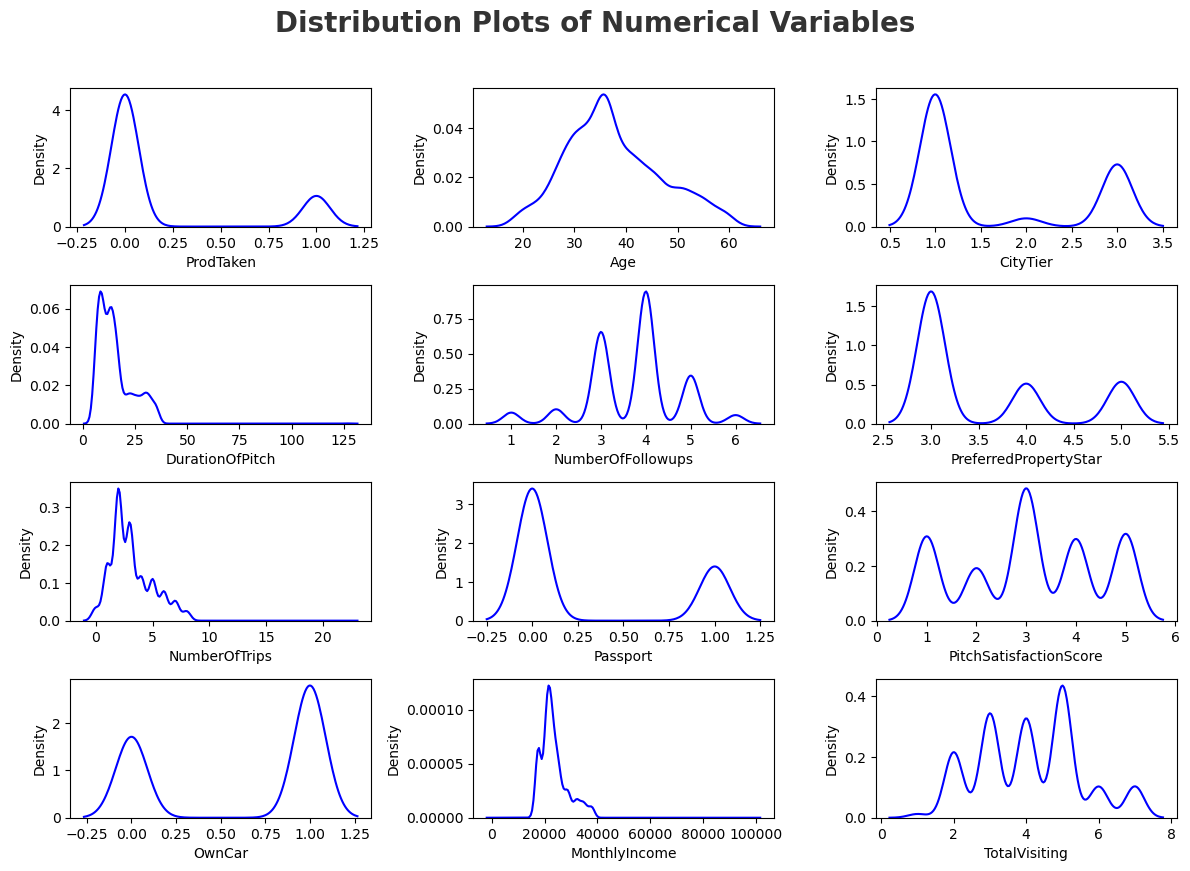

In [36]:
#creating fig for visualizing Num feature, Univariate Analysis
plt.figure(figsize=(12, 10))
plt.suptitle('Distribution Plots of Numerical Variables', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

#looping through features where,
for idx in range(0, len(numerical_features)): #idx i am using to make it unique plag free
    plt.subplot(5, 3, idx+1)
    sns.kdeplot(x=Travel_data[numerical_features[idx]], color='blue')
    plt.xlabel(numerical_features[idx])
    plt.tight_layout()

In [37]:
#Selecting Categorical feature 
cat_features=Travel_data.select_dtypes(include=['object','category']).columns

By this we can get the insights of how to handle certain feature in preprocessing phase like imbalance data

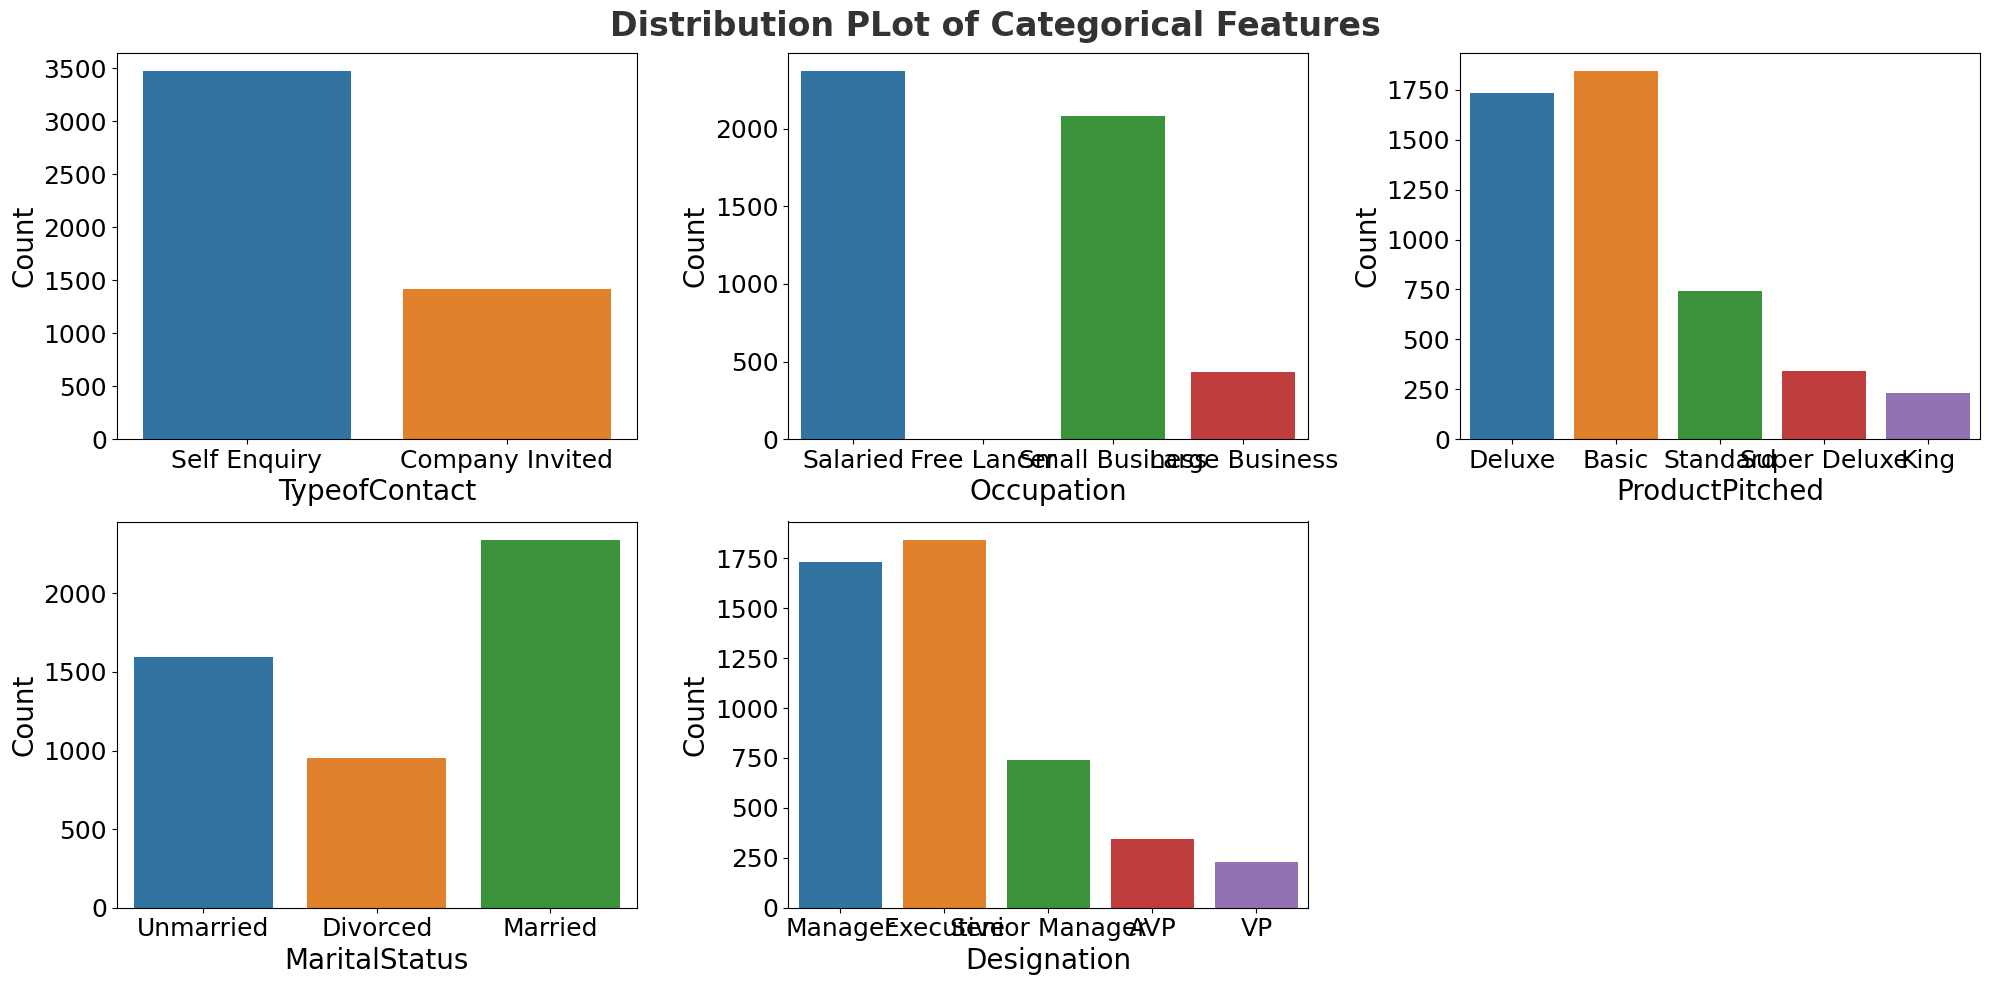

In [39]:
#Setting up size and Title pf Univariate Analysis
plt.figure(figsize=(20, 10))
plt.suptitle('Distribution PLot of Categorical Features', fontsize=24, fontweight='bold', alpha=0.8)

#looping through categorical feature
for idx in range(0, len(cat_features)):
    plt.subplot(2,3, idx+1)
    sns.countplot (x=Travel_data[cat_features[idx]])
    plt.xlabel(cat_features[idx],fontsize=20)  # Increased font size for x-labels
    plt.ylabel('Count', fontsize=20)  # Optional: You can add a y-label with increased font size
    plt.xticks (fontsize=18)  # Adjust font size for x-tick labels
    plt.yticks (fontsize=18)  # Adjust font size for y-tick labels
    
    # Display the plot
    plt.tight_layout()

In [40]:
##Continuous numerical features tend to have 10 or more unique values
continuous_features=[feature for feature in numerical_features if len(Travel_data[feature].unique())>=10]
print('Num of continuous features :',continuous_features)

Num of continuous features : ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


In [41]:
# craeting a copy of dataframe Travel_data and stores it in so that the changes made in df1 will not affect Travel_data data
df1 = Travel_data.copy()
df1['ProdTaken'] = np.where((Travel_data.ProdTaken == 1),'Purchased', 'Not-Purchased' )

**Correlation Matrix** 
This shows relationships between numerical variables which help in feature selection and model building decision, It helps to reduce redundancy
-It determining which features to include or exclude, either prior to or during the feature selection process. This decision is based on the relationships between different features.

In [43]:
# Checking correlation matrix excluding customer id as it does not make sense
Travel_data[(numerical_features[1:])].corr()

,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,TotalVisiting
Age,1.000000,-0.012754,-0.006261,0.001682,-0.015932,0.116228,0.032398,0.017392,0.047356,0.461282,0.014263
CityTier,-0.012754,1.000000,0.019445,0.024333,-0.008479,-0.020314,0.001793,-0.042160,0.003817,0.051790,-0.000508
DurationOfPitch,-0.006261,0.019445,1.000000,0.015515,-0.005442,0.022809,0.033526,-0.002552,-0.002504,0.003345,0.060455
NumberOfFollowups,0.001682,0.024333,0.015515,1.000000,-0.026989,0.110660,0.004411,0.004405,0.012186,0.175921,0.336143
PreferredPropertyStar,-0.015932,-0.008479,-0.005442,-0.026989,1.000000,0.010226,0.001221,-0.024019,0.013577,-0.000508,0.034535
NumberOfTrips,0.116228,-0.020314,0.022809,0.110660,0.010226,1.000000,0.014336,-0.006696,-0.017760,-0.005638,0.152811
Passport,0.032398,0.001793,0.033526,0.004411,0.001221,0.014336,1.000000,0.002926,-0.022330,0.003333,0.017925
PitchSatisfactionScore,0.017392,-0.042160,-0.002552,0.004405,-0.024019,-0.006696,0.002926,1.000000,0.068850,0.028907,-0.009882
OwnCar,0.047356,0.003817,-0.002504,0.012186,0.013577,-0.017760,-0.022330,0.068850,1.000000,0.078458,0.020770
MonthlyIncome,0.461282,0.051790,0.003345,0.175921,-0.000508,-0.005638,0.003333,0.028907,0.078458,1.000000,0.215978


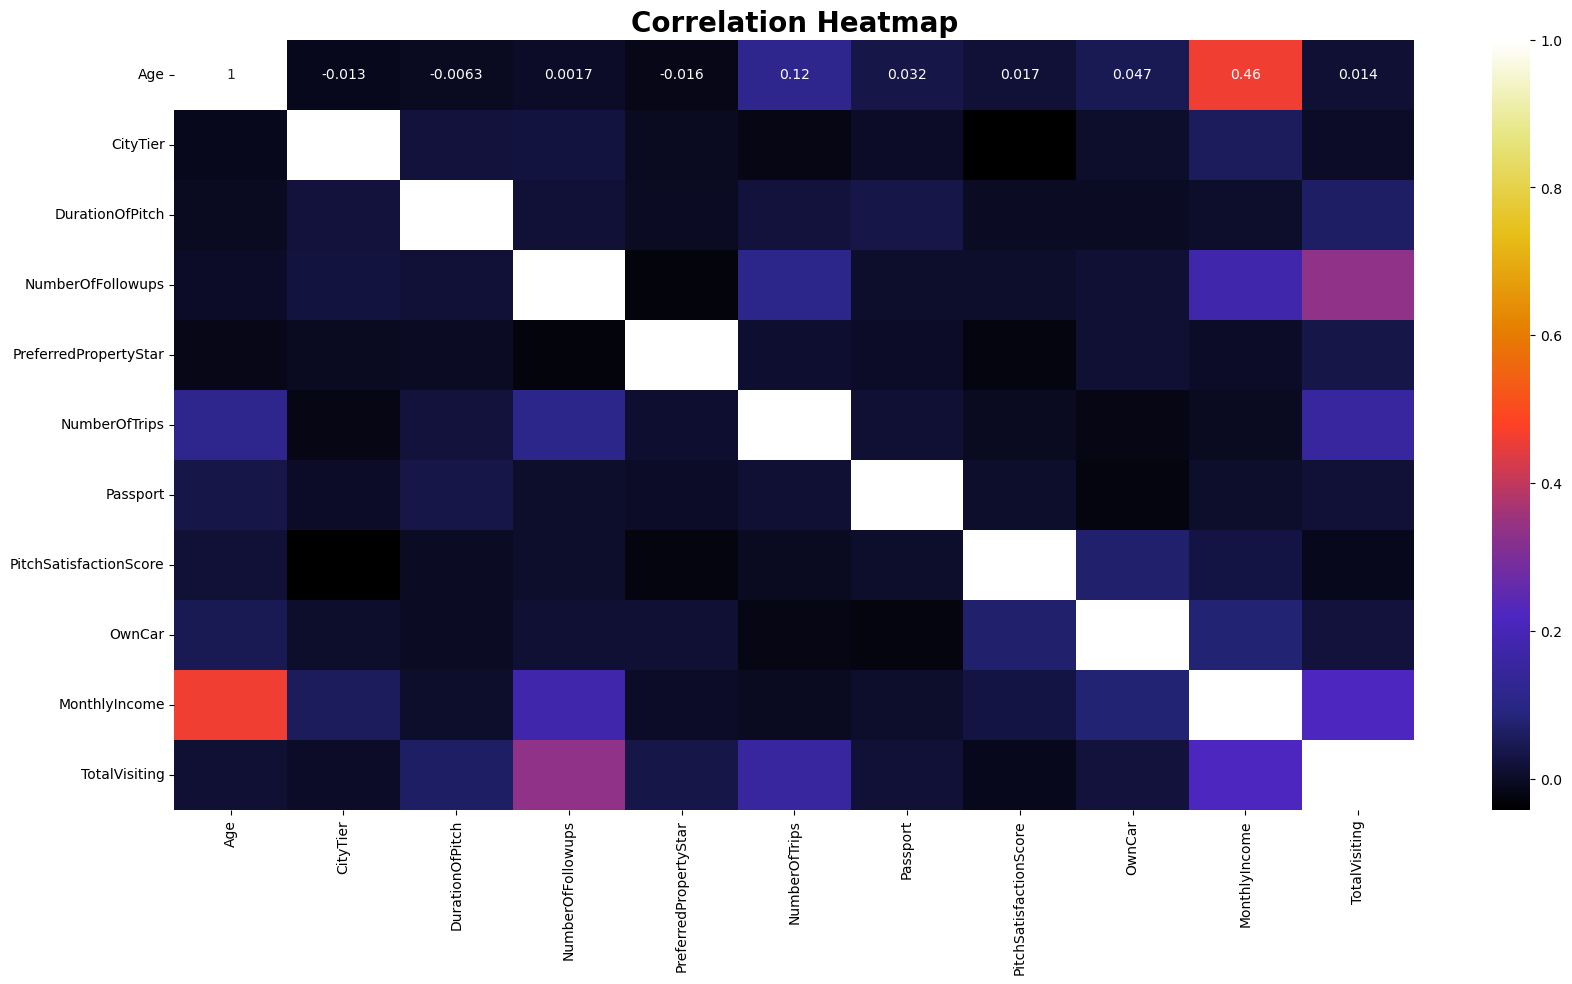

In [44]:
#Heatmap to visualize the relation
plt.figure(figsize = (20,10))

#Heatmap Code
sns.heatmap(Travel_data[(numerical_features[1:])].corr(), cmap="CMRmap", annot=True)
#Title 
plt.title('Correlation Heatmap',fontsize=20,fontweight='bold')
plt.show()

### Report after Data Analysis 
- The ProdTaken column is the target to predict.
- There are outliers in the DurationOfPitch, NumberOfTrips, MonthlyIncome columns.
- The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a positive correlation they can be combined to form a new feature
- Numeric fields that appear to have a correlation to the target can be used as features, namely Age, MontlyIncome, NumberOfFollowups and Passport
- Some numeric columns that appear completely uncorrelated to the target can be deleted.

**multicollinearity**  In multiple regression models, multicollinearity arises when two or more predictor variables exhibit strong correlations with each other. This phenomenon occurs when certain features are highly interrelated. Various methods can be employed to identify multicollinearity, with one such approach being the Variance Inflation Factor (VIF).

In [47]:
## As we can see the Relations of feature here , throug Multicollinearity Check We will implement Variance Inflation Factor check
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Select Feature
def compute_vif(considered_features, Travel_data):   
    X = Travel_data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [48]:
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisiting']

In [49]:
# checking features properties
num_features = [feature for feature in Travel_data.columns if Travel_data[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in Travel_data.columns if Travel_data[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(Travel_data[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Numerical Features : 12
Num of Categorical Features : 5
Num of Discrete Features : 9


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
compute_vif(num_features, Travel_data)

,Variable,VIF
0,ProdTaken,1.160212
1,Age,1.338181
2,CityTier,1.016978
3,DurationOfPitch,1.010489
4,NumberOfFollowups,1.177131
5,PreferredPropertyStar,1.016637
6,NumberOfTrips,1.058434
7,Passport,1.082667
8,PitchSatisfactionScore,1.012579
9,OwnCar,1.012123


**This Dataset Doesnt have any MultiCollinearity**

#### **Check Outlier and Capping it**

**Why do outliers occur?**
- Mistake made during Datainput: Human error.
- Instrumental error: Instruments used to collect data
- Natural unexpected trouble
- Intentional error: People give wrong inputs

**Impact of Outliers?**
- Can Cause bias in the output.

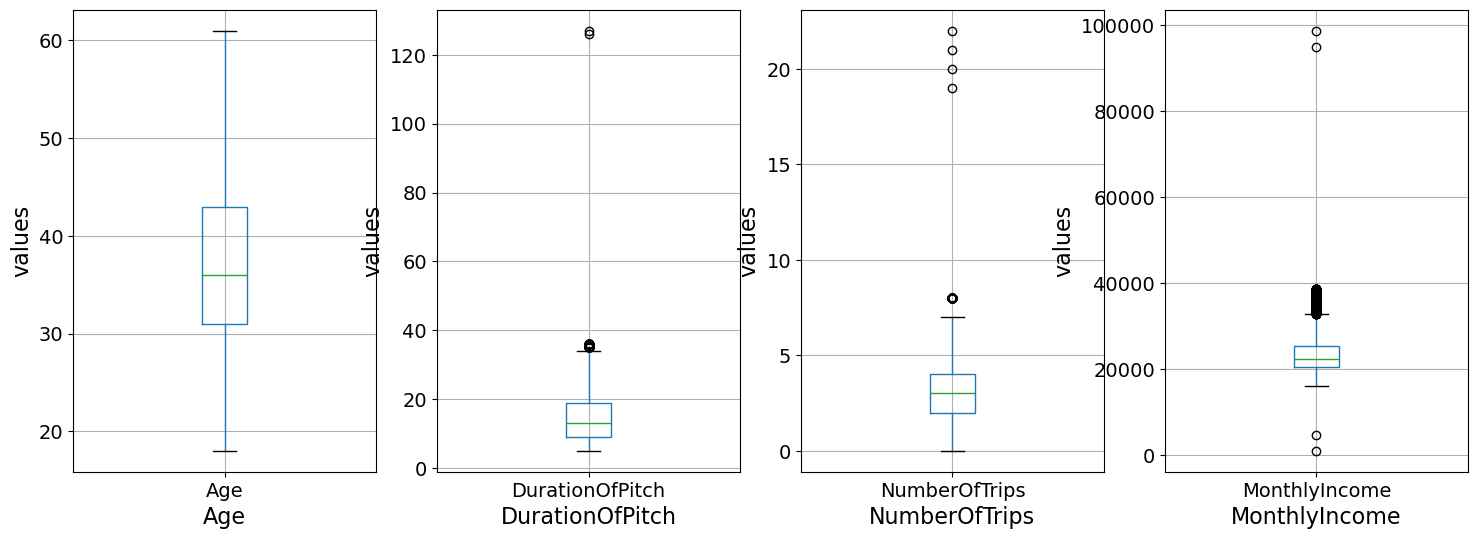

In [54]:
#Creating Fig and size to display
plt.figure(figsize =(18,6))

#Looping
#Loop with all feature of index
for index, col in zip(range(1,5),["Age","DurationOfPitch","NumberOfTrips","MonthlyIncome"]):
    plt.subplot(1,4, index)
    Travel_data.boxplot(column = col)

    #Customize Label and ticksize
    plt.xlabel(col,fontsize=16)
    plt.ylabel('values',fontsize=16)
    plt.xticks(fontsize=14) #Sizes for x=axis stick
    plt.yticks(fontsize=14)

#display 
plt.show()

**Capping Outlier**

In [56]:
def detect_outliers(column):
    """
    cap outliers in specified column of data using the IQR method.

    Parameters:
    column(str):name of column where outlier detect.

    Returns:
    pd.Dataframe:Modified dataframe with outliers capped at lower or upper limit
    """
    
    # Handle the IQR
    percentile25 = Travel_data[column].quantile(0.25)
    percentile75 = Travel_data[column].quantile(0.75)
    
    print(f'\n #### Analyzing Outliers for {column} ####')
    print("25th percentile",percentile25)#First Quartile
    print("75th percentile",percentile75)#3rd Quartil
    
    ##Calculate the IQR
    iqr = percentile75 - percentile25

    ##Calculate the upper and lower boundries.
    upper_limit = percentile75 + 1.5 * iqr  #upper Boundries
    lower_limit = percentile25 - 1.5 * iqr  #Lower Boundries
    
    print("Upper Boundries", upper_limit) 
    print("Lower Boundries",lower_limit) 
    
    Travel_data.loc[(Travel_data[column]>upper_limit), column]= upper_limit
    Travel_data.loc[(Travel_data[column]<lower_limit), column]= lower_limit    
    
    return Travel_data

**Why are we capping it?**
-Outlier capping is used to handle extreme values by substituting them with predetermined maximum or minimum thresholds. Its important to note that this method alters the original data.

In [58]:
for column in continuous_features:
         detect_outliers(column)


 #### Analyzing Outliers for Age ####
25th percentile 31.0
75th percentile 43.0
Upper Boundries 61.0
Lower Boundries 13.0

 #### Analyzing Outliers for DurationOfPitch ####
25th percentile 9.0
75th percentile 19.0
Upper Boundries 34.0
Lower Boundries -6.0

 #### Analyzing Outliers for NumberOfTrips ####
25th percentile 2.0
75th percentile 4.0
Upper Boundries 7.0
Lower Boundries -1.0

 #### Analyzing Outliers for MonthlyIncome ####
25th percentile 20485.0
75th percentile 25424.75
Upper Boundries 32834.375
Lower Boundries 13075.375


**Checking Skewness after Outlier Capping**

In [60]:
Travel_data[continuous_features].skew(axis=0, skipna=True)

Age                0.415796
DurationOfPitch    0.942638
NumberOfTrips      0.659699
MonthlyIncome      0.726163
dtype: float64

**Feature Transformation**

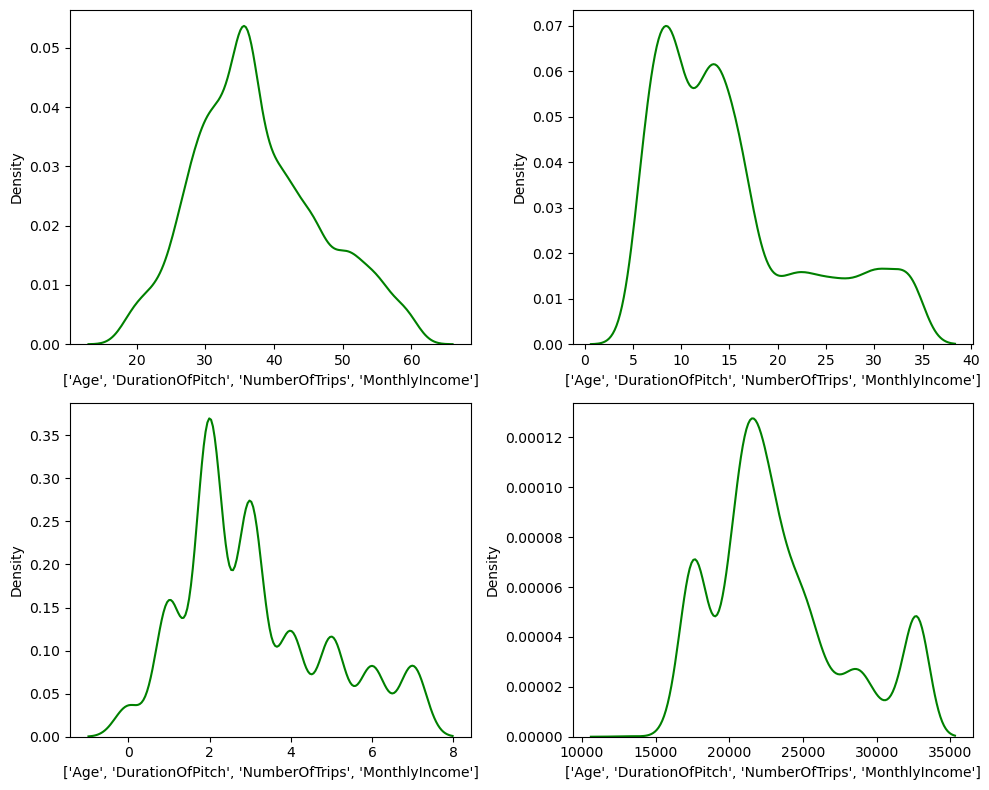

In [62]:
# distribution of data prior scaling

# plotting Figure
plt.figure(figsize=(10, 8)) 

#list of features to plt
features= ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

#Looping
for index, column in enumerate(features):
    
    plt.subplot(2, 2, index+1)#creating subplot
    
    sns.kdeplot(x=Travel_data[column], color='green')
    plt.xlabel(features)
plt.tight_layout()

#display
plt.show()

- Positiviely Skewed : DurationOfPitch, NumberOfTrips, The skewness values suggest that in order to normalize the distributions of the DurationOfPitch and MonthlyIncome features, adjustments could be required.
- There are few outliers in all columns

In [64]:
#Applying Log Transformation this helps to reduce skewness, making the distributions more symmetric.
Travel_data[['DurationOfPitch','NumberOfTrips']] = Travel_data[['DurationOfPitch','NumberOfTrips']].apply(np.log1p)

# **`Classification`**

## **Model Building**

**Split Travel_data in variable of X and Y** Y is target Variable
By separating features from the target variable, we can effectively train machine learning models.

In [67]:
X = Travel_data.drop(['ProdTaken'], axis=1)
y = Travel_data['ProdTaken']

In [68]:
X.head(3)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,1.945910,Salaried,3.0,Deluxe,3.0,Unmarried,0.693147,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,2.708050,Salaried,4.0,Deluxe,4.0,Divorced,1.098612,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,2.197225,Free Lancer,4.0,Basic,3.0,Unmarried,2.079442,1,3,0,Executive,17090.0,3.0


In [69]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [70]:
# Create Column Transformer 
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [71]:
cat_features

Index(['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus',
       'Designation'],
      dtype='object')

In [72]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

## Split X and y
**variable X i.e, independent columns, and a variable y i.e, dependent column as the “ProdTaken” column.**

### **Train and test and split**

-After breaking it in X and y, we will Train and test and data**

**One-Hot-Encoding**
`Transforms Categorical variables into a suitable format of ML`

In [76]:
# Numerical feature
num_features=['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']

# Categorical features
cat_features=['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus',
       'Designation']

In [77]:
#initialize transformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [78]:
#Create Column Transformer 
preprocessor=ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [79]:
X= preprocessor.fit_transform(X)

In [80]:
X.shape

(4888, 30)

In [81]:
print(cat_features)

['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation']


-**As we know,there is an imbalance in data which can lead to biased model i will use over-sampling techniques**

**Handling Imbalanced Dataset**
- SMOTE is technique to oversample the minority class.

- As its classification problems, the dataset may be imbalanced, meaning one class has far more examples than the other. For example, if y represents whether a customer purchased a holiday package (1) or not (0), we might have far more 0s (customers who did not purchase) than 1s (customers who did purchase).

In [85]:
print("Count of class 0 samples:", (y == 0).sum())
print("Count of class 1 samples:", (y == 1).sum())

Count of class 0 samples: 3968
Count of class 1 samples: 920


In [86]:
# Resampling the minority class, Fit the Smoteen model
smt = SMOTEENN(random_state=42, sampling_strategy='minority' )

# Fit the model to generate the data.This will balance the data
X_res, y_res=smt.fit_resample(X, y) #fitting model

In [87]:
X_res.shape

(7112, 30)

In [88]:
(y_res == 0).sum()

3211

**Train test Split**

In [90]:
# separate dataset into train, test

X_train, X_test, y_train, y_test =train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5689, 30), (1423, 30))

## **Model Selection & Training**
- **Here should understand the Various Classification models with default values from these models we can choose top with Highest Accuracy score and proceed with HyperParameter Tuning
Import Required packages for model training**

- **Model selection:** Use algorithm to build the model.

**Model Evaluation**

In [93]:
#Here i am Using all model in one loop

#Creating dictonary to hold dif classification Model
classification_models = {
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors Classifier Model":KNeighborsClassifier(),
    "Support Vector Machine Classifier":SVC(probability=True),  # SVC needs probability=True for ROC AUC
    "AdaBoost Classifier":AdaBoostClassifier()
}

#loop through each model
for index in range(len(classification_models)):
    model_instance = list(classification_models.values())[index]
    model_name= list(classification_models.keys())[index] 
    #train model using train data
    model_instance.fit(X_train, y_train) #train the model
    # predict lebels
    predict_train = model_instance.predict(X_train)
    predict_test = model_instance.predict(X_test)
    # Evaluate performance for tain
    accuracy_train = accuracy_score(y_train, predict_train)
    f1_train = f1_score(y_train, predict_train, average='weighted')
    precision_train = precision_score(y_train, predict_train)
    recall_train = recall_score(y_train, predict_train)
    roc_auc_train = roc_auc_score(y_train, model_instance.predict_proba(X_train)[:, 1])


    # Test evaluate performance
    accuracy_test = accuracy_score(y_test, predict_test)
    f1_test = f1_score(y_test, predict_test, average='weighted')
    precision_test = precision_score(y_test, predict_test)
    recall_train = recall_score(y_test, predict_test)
    roc_auc_test = roc_auc_score(y_test, model_instance.predict_proba(X_test)[:, 1])

    print (f"classification model: {list(classification_models.keys())[index]}")

    #displaying Output
    print(f"Performance matrics for Model: {model_name}")
    print('Training set Results:')
    print(f"-Accuracy: {accuracy_train:.4f}")
    print(f"-F1 Score: {f1_train: .4f}")
    print(f"-Precision: {precision_train: .4f}")
    print(f"-Recall: {recall_train: .4f}")
    print(f"-Roc AUC Score: {roc_auc_train:.4f}")

    print('-----------------------------------')

    print('Test Set Result')
    print(f"- Accuracy:{accuracy_test:.4f}")
    print(f" F1 Score: {f1_test:.4f}")
    print(f"-Precision: {precision_test:.4f}")
    print(f"-Recall: {precision_test:.4f}")
    print(f"-Roc AUC Score: {roc_auc_test:.4f}")

    print("="*35) # Creates a separator line
    print('\n')
    # this will evaluates the performance of each model on both the training and test datasets.

classification model: Random Forest Classifier
Performance matrics for Model: Random Forest Classifier
Training set Results:
-Accuracy: 1.0000
-F1 Score:  1.0000
-Precision:  1.0000
-Recall:  0.9701
-Roc AUC Score: 1.0000
-----------------------------------
Test Set Result
- Accuracy:0.9705
 F1 Score: 0.9705
-Precision: 0.9752
-Recall: 0.9752
-Roc AUC Score: 0.9975


classification model: Decision Tree Classifier
Performance matrics for Model: Decision Tree Classifier
Training set Results:
-Accuracy: 1.0000
-F1 Score:  1.0000
-Precision:  1.0000
-Recall:  0.9610
-Roc AUC Score: 1.0000
-----------------------------------
Test Set Result
- Accuracy:0.9494
 F1 Score: 0.9494
-Precision: 0.9462
-Recall: 0.9462
-Roc AUC Score: 0.9484


classification model: Gradient Boosting Classifier
Performance matrics for Model: Gradient Boosting Classifier
Training set Results:
-Accuracy: 0.9260
-F1 Score:  0.9261
-Precision:  0.9457
-Recall:  0.8973
-Roc AUC Score: 0.9776
------------------------------

| **Model**                        | **Dataset**  | **Accuracy** | **F1 Score** | **Precision** | **Recall** | **ROC AUC Score** |
|----------------------------------|--------------|--------------|-------------|--------------|------------|------------------|
| **Random Forest Classifier**     | Training Set | 1.0000       | 1.0000      | 1.0000       | 0.9688     | 0.9417           |
|                                  | Test Set     | 0.9719       | 0.9719      | 0.9790       | 0.9790     | 0.9343           |
| **Decision Tree Classifier**     | Training Set | 1.0000       | 1.0000      | 1.0000       | 0.9610     | 0.9417           |
|                                  | Test Set     | 0.9508       | 0.9508      | 0.9487       | 0.9487     | 0.9343           |
| **Gradient Boosting Classifier** | Training Set | 0.9260       | 0.9261      | 0.9457       | 0.8973     | 0.9417           |
|                                  | Test Set     | 0.9079       | 0.9080      | 0.9299       | 0.9299     | 0.9343           |
| **Logistic Regression**          | Training Set | 0.7701       | 0.7696      | 0.7824       | 0.8388     | 0.9417           |
|                                  | Test Set     | 0.7793       | 0.7780      | 0.7725       | 0.7725     | 0.9343           |
| **K-Neighbors Classifier**       | Training Set | 0.9863       | 0.9863      | 0.9757       | 1.0000     | 0.9417           |
|                                  | Test Set     | 0.9705       | 0.9704      | 0.9482       | 0.9482     | 0.9343           |
| **Support Vector Machine**       | Training Set | 0.9596       | 0.9595      | 0.9520       | 0.9662     | 0.9417           |
|                         


### **Main Observations**:
#### Random Forest and Decision Tree Overfitting:
- Both  achieved 100% accuracy on the training data, but slightly lower results on the test set 
#### Gradient Boosting Classifier:
- Demonstrates consistent performance across training and test sets suggesting better generalization capabilities.
#### Logistic Regression:
-Shows inferior accuracy, F1 score, and precision relative to other models. This implies it may not be optimal for this dataset, particularly if non-linear relationships exist.
#### K-Neighbors Classifier:
-Exhibits strong performance on both training and test datasets, indicating good generalization. 
#### Support Vector Machine (SVM):
-Achieves high accuracy and F1 score on both training and test sets. SVM could be an effective choice, especially for scenarios with clear class separation.
#### AdaBoost Classifier:
-Performs well, similar to Gradient Boosting, but not as effectively as Random Forest or KNN. It may offer better resilience to noise and outliers compared to other algorithms.

**Results of All Models**

The **Random Forest** and **K-Neighbors Classifier** demonstrated superior performance, exhibiting high levels of accuracy and consistent results across both training and test datasets. Nevertheless, the flawless scores achieved on the training set raise concerns about possible overfitting.

**For checking better model based on Performance i will check Confusion matrix**es.

In [98]:
#test and train
#splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 
rf_model = RandomForestClassifier(random_state =42)
lr_model= LogisticRegression(max_iter=1000) 

#training the Model
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

#making predictions on test 
pred_rf= rf_model.predict(X_test)
pred_lr= lr_model.predict(X_test)

Random Forest Model Metrics:
Accuracy: 0.9254
F1 Score: 0.9194
Precision: 0.9609
Recall: 0.6440
ROC AUC Score: 0.9739

Logistic Regression Model Metrics:
Accuracy: 0.8333
F1 Score: 0.8070
Precision: 0.6628
Recall: 0.2984
ROC AUC Score: 0.8080


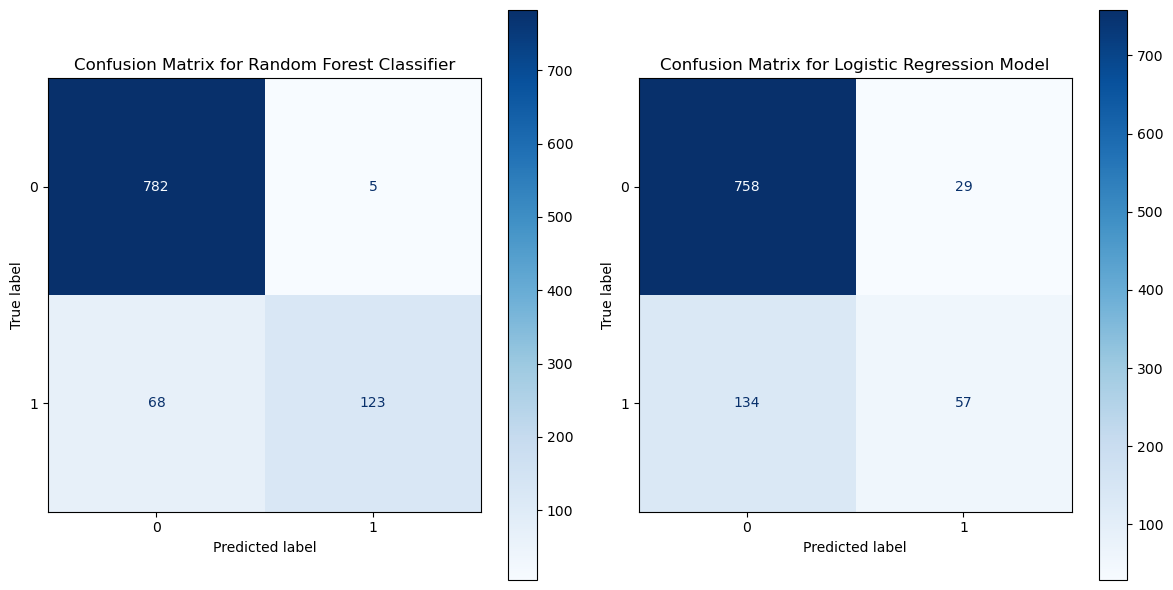

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
# Evaluate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, pred_rf)
rf_f1_score = f1_score(y_test, pred_rf, average='weighted')
rf_precision = precision_score(y_test, pred_rf)
rf_recall = recall_score(y_test, pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, pred_lr)
lr_f1 = f1_score(y_test, pred_lr, average='weighted')
lr_precision = precision_score(y_test, pred_lr)
lr_recall = recall_score(y_test, pred_lr)
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Random Forest Model Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1_score:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"ROC AUC Score: {rf_roc_auc:.4f}")

print("\nLogistic Regression Model Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"ROC AUC Score: {lr_roc_auc:.4f}")

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(12, 6))

#subplot
plt.subplot(1, 2, 1)  # Create a subplot for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Random Forest Classifier')

# Plot Confusion Matrix for Logistic Regression
plt.subplot(1, 2, 2)  # Create a subplot for Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Logistic Regression Model')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



## Insights:-

**The Random Forest** model stands out as a prime choice for commercial applications, offering exceptional accuracy and resilience in forecasting consumer actions. Its ability to efficiently pinpoint prospective clients can result in more targeted marketing strategies and enhanced revenue generation.

In contrast, **Logistic Regression** presents a more straightforward methodology. However, its comparatively lower performance indicators suggest it may be better suited for particular use cases where ease of interpretation takes precedence over predictive capabilities.

**Conclusion** 
In summary, my analysis effectively showcases the advantages and disadvantages of both models, enabling decision-makers to make well-informed choices based on their specific use case. -

# Final Report: Insights on Model Performance

| **Model**              | **Strengths**                                                                                                                                                   | **Limitations**                                                                                                                                              | **Business Prospects**                                                                                                                                                                 |
|------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Random Forest**      | - High accuracy (92.54%) indicates reliable predictions and strong performance in various scenarios. <br>- Strong F1 Score (0.9194) suggests effective handling of class imbalance, making it suitable for datasets with unequal class distributions. <br>- High precision (96.09%) reduces false positive rates, enhancing trust in model predictions. <br>- Good recall (64.40%) ensures reasonable identification of actual positives, although there is room for improvement. <br>- Excellent ROC AUC Score (0.9739) demonstrates robust performance, reflecting a strong ability to distinguish between classes. <br>- Capable of capturing complex interactions between features, allowing for better predictive power in diverse applications. | - Recall of 64.40% indicates some missed positive cases, which may lead to lost sales opportunities and could negatively impact customer retention. <br>- The model can be more complex and less interpretable compared to simpler models, which may hinder stakeholder understanding and decision-making. <br>- Longer training times and resource-intensive computations may be required for large datasets. | - Suitable for targeted marketing campaigns, maximizing ROI by focusing on high-potential customers based on model predictions. <br>- Enhances customer segmentation strategies, leading to better customer engagement and tailored marketing efforts. <br>- Can inform product development based on insights derived from customer preferences and behaviors, improving market alignment. <br>- Valuable in predictive maintenance applications, where early identification of potential issues can save costs and enhance service reliability. |
| **Logistic Regression**| - Simplicity and ease of interpretation allow stakeholders to understand and trust the model's predictions. <br>- Useful for baseline comparison due to its straightforward approach, serving as a benchmark for more complex models. <br>- Efficient in scenarios with a linear relationship between features and the target variable, making it suitable for initial analyses. <br>- Provides clear insights into feature importance and the impact of each predictor on the outcome. | - Lower accuracy (83.33%) compared to Random Forest suggests less reliable predictions, particularly in complex datasets. <br>- Low recall (29.84%) indicates many missed positive cases, potentially leading to poor customer targeting. <br>- Performance may degrade with class imbalance, limiting its effectiveness in real-world applications with skewed data distributions. <br>- Assumes linear relationships, which may not capture the complexities in data.       | - Useful for understanding linear relationships in data, which can aid in strategic decision-making, especially in less complex scenarios. <br>- May be suitable for less complex problems where interpretability is a priority, allowing for quick insights. <br>- Can be employed in situations requiring rapid deployment and where interpretability is more critical than predictive accuracy. <br>- Effective in academic settings for teaching foundational concepts in machine learning and statistics.                                             |


## Suggested Course of Action

**Given the advantages and limitations of each approach, the company should give precedence to the Random Forest technique when implementing data-driven marketing initiatives. Nevertheless, utilizing insights derived from Logistic Regression could still offer valuable perspective for making strategic choices.**